In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import obspy
import matplotlib.image as image
import os

In [3]:
###############TRANING##########

In [3]:

good_traces=['cal1',
 'chl1',
 'chl2',
 'chl3',
 'cps',
 'crt',
 'csbg',
 'bon1',
 'fij',
 'kam',
 'mnd',
 'nic',]

In [4]:
noisy_traces=['okt1','cal1' ,'cal2','okt4','okt5','cal4',
 'chl1',
 'chl2',
 'chl3',
 'cps',
 'crt',
 'csbg',
 'fij',
 'kam',
 'mnd',
 'nic',
 'okt2',
 'okt3','bon1','jap']
 
 

In [5]:
xtrain_bad=[]
for i in eq_list_bad:
    st_bad=obspy.read("/home/Madhu/Documents/dataset_classification/data/bad_traces/noisy_traces_"+str(i)+"/*")
    for tr in st_bad:
        xtrain_bad.append(tr.data[:6000]/np.std(tr.data));
print(len(xtrain_bad))
ytrain_bad=np.array(np.zeros(len(xtrain_bad)))

15622


In [6]:
xtrain_bad=np.array(xtrain_bad)

In [7]:
xtrain_good=[]
for i in eq_list_good:
    st_good=obspy.read("/home/Madhu/Documents/dataset_classification/data/good_traces/good_traces_"+str(i)+"/*")
    for tr in st_good:
        xtrain_good.append(tr.data[:6000]/np.std(tr.data));
print(len(xtrain_good))
(xtrain_good)= np.array(xtrain_good);
ytrain_good=np.array(np.ones(len(xtrain_good)))

53289


In [8]:
xtrain= np.concatenate((xtrain_good,xtrain_bad), 0)
ytrain= np.concatenate((ytrain_good, ytrain_bad), 0)

In [9]:
###########MODEL START################

In [10]:
input_s=6000

In [11]:
model=keras.Sequential([
    keras.layers.Dense(input_s//2,input_shape=(input_s,),activation='elu'),
    keras.layers.Dense(input_s//4,input_shape=(input_s//2,),activation='elu'),
    keras.layers.Dense(input_s//8,input_shape=(input_s//4,),activation='elu'),
    keras.layers.Dense(input_s//16,input_shape=(input_s//8,),activation='elu'),
    keras.layers.Dense(1,activation='sigmoid')                                                                                                            #every neuron connected with other layer
])

In [12]:
np.shape(xtrain)
# np.shape(xtest)

(68911, 6000)

In [13]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [19]:
history=model.fit(
    xtrain,ytrain,epochs=10,batch_size=256,steps_per_epoch=200)

Epoch 1/10
  2/200 [..............................] - ETA: 10s - loss: 0.2537 - accuracy: 0.9473

2024-01-26 19:38:08.587198: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1653864000 exceeds 10% of free system memory.


200/200 [==============================] - 9s 47ms/step - loss: 0.1213 - accuracy: 0.9586
Epoch 2/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0885 - accuracy: 0.9686
Epoch 3/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0737 - accuracy: 0.9728
Epoch 4/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0649 - accuracy: 0.9759
Epoch 5/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0507 - accuracy: 0.9810
Epoch 6/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0500 - accuracy: 0.9818
Epoch 7/10
200/200 [==============================] - 9s 46ms/step - loss: 0.0479 - accuracy: 0.9832
Epoch 8/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0443 - accuracy: 0.9834
Epoch 9/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0415 - accuracy: 0.9854
Epoch 10/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0328 - accuracy: 0.9892


In [20]:
#############END##################

In [ ]:
############Testing###############

In [32]:

eq_list_t=['fiji']
xtest_bad=[]
for i in eq_list_t:
    st_bad_t=obspy.read("/home/Madhu/Documents/dataset_classification/data/bad_traces/noisy_traces_"+"fij/*")
    
    for tr in st_bad_t:
        xtest_bad.append(tr.data[:6000]/np.std(tr.data));
print(len(xtest_bad))
ytest_bad=np.array(np.zeros(len(xtest_bad)))

166


In [33]:
xtest_good=[]
for i in eq_list_t:
    st_good_t=obspy.read("/home/Madhu/Documents/dataset_classification/data/good_traces/good_traces_"+"fij/*")
    for tr in st_good_t:
        xtest_good.append(tr.data[:6000]/np.std(tr.data));
print(len(xtest_good))
ytest_good=np.array(np.ones(len(xtest_good)))

6784


In [34]:
xtest= np.concatenate((xtest_good,xtest_bad), 0)
ytest= np.concatenate((ytest_good, ytest_bad), 0)

In [35]:
model.evaluate(xtest,ytest)

218/218 [==============================] - 2s 10ms/step - loss: 0.1259 - accuracy: 0.9842


[0.12585760653018951, 0.9841726422309875]

In [36]:
y_predicted=model.predict(xtest)


218/218 [==============================] - 2s 10ms/step


In [37]:
score = model.evaluate(xtest, ytest, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12585760653018951
Test accuracy: 0.9841726422309875


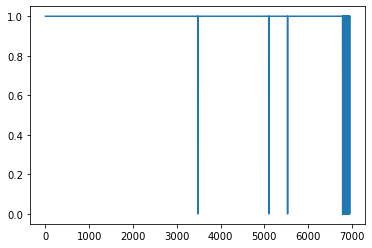

In [41]:
y=[]
for i in y_predicted:
    if i<= 0.5:
        i=0
    else:
        i=1
    y.append(i)

plt.plot(y)


In [42]:
model.save('/home/Madhu/classification_20thmay')

INFO:tensorflow:Assets written to: /home/ishalohan/classification_20thmay/assets
